In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

C:\Users\tcumi\github_repo\neural-network\python\layer.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.sum(w * X) + b


Checkpoint 100, Accuracy: 0.8580246913580247, Loss: 0.5870531576651113
Checkpoint 200, Accuracy: 0.8580246913580247, Loss: 0.5702515354862919


C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


Checkpoint 300, Accuracy: 0.8580246913580247, Loss: 0.5686582282737449
Checkpoint 400, Accuracy: 0.8703703703703703, Loss: 0.5674299310754847
Checkpoint 500, Accuracy: 0.8703703703703703, Loss: 0.5726395359745732


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.90969425]
 [0.05951329]
 [0.03079247]]
[0. 1. 0.] <-> [[0.10860841]
 [0.5444816 ]
 [0.34691   ]]
[1. 0. 0.] <-> [[0.9082133 ]
 [0.06134117]
 [0.03044545]]
[1. 0. 0.] <-> [[0.90825504]
 [0.06124578]
 [0.03049915]]
[1. 0. 0.] <-> [[0.39803672]
 [0.2932441 ]
 [0.30871913]]
[0. 1. 0.] <-> [[0.46839288]
 [0.27159372]
 [0.2600134 ]]
[1. 0. 0.] <-> [[0.908594  ]
 [0.0607551 ]
 [0.03065088]]
[1. 0. 0.] <-> [[0.45919332]
 [0.28040394]
 [0.26040277]]
[1. 0. 0.] <-> [[0.9084112 ]
 [0.06192925]
 [0.02965956]]
[0. 0. 1.] <-> [[0.02742268]
 [0.19632706]
 [0.7762503 ]]
[1. 0. 0.] <-> [[0.51173115]
 [0.28029752]
 [0.20797133]]
[1. 0. 0.] <-> [[0.9084429 ]
 [0.06094944]
 [0.03060768]]
[1. 0. 0.] <-> [[0.44510457]
 [0.299712  ]
 [0.25518343]]
[0. 1. 0.] <-> [[0.5487686 ]
 [0.2001709 ]
 [0.25106052]]
[1. 0. 0.] <-> [[0.5203653 ]
 [0.2155585 ]
 [0.26407623]]
[1. 0. 0.] <-> [[0.90818334]
 [0.06146058]
 [0.03035614]]
[1. 0. 0.] <-> [[0.5440621 ]
 [0.20972122]
 [0.24621667]]
[0. 0. 1.] <->

C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


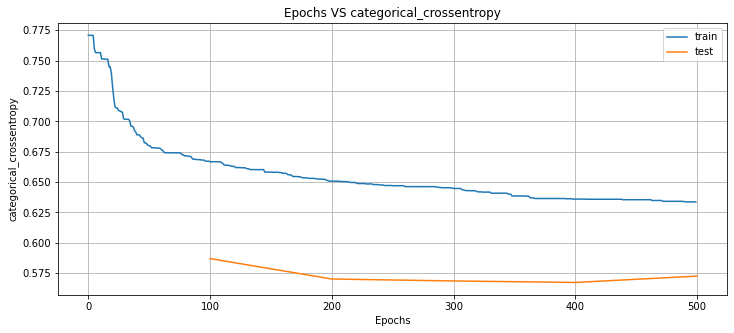

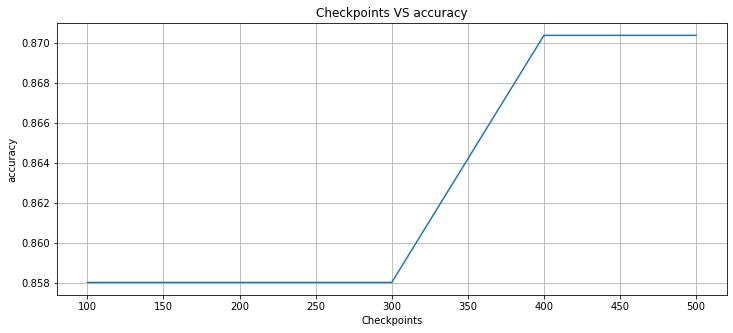

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8580246913580247, 'mean_square_error': 2.8921192178308113, 'categorical_crossentropy': 0.5870531576651113, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 4}, 1: {'tp_hit': 5, 'fp_hit': 10, 'tn_hit': 83, 'fn_hit': 10}, 2: {'tp_hit': 4, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 9}}, 'checkpoint': 100} 


{'accuracy': 0.8580246913580247, 'mean_square_error': 2.8757545895221477, 'categorical_crossentropy': 0.5702515354862919, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 13, 'tn_hit': 15, 'fn_hit': 4}, 1: {'tp_hit': 5, 'fp_hit': 9, 'tn_hit': 84, 'fn_hit': 10}, 2: {'tp_hit': 4, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 9}}, 'checkpoint': 200} 


{'accuracy': 0.8580246913580247, 'mean_square_error': 2.923810899207854, 'categorical_crossentropy': 0.5686582282737449, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 14, 'tn_hit': 14, 'fn_hit': 3}, 1: {'tp_hit': 4, 'fp_hit': 8, 'tn_hit': 85, 'fn_hit': 11}, 2: {'tp_hit': 4, 'fp_hit': 1, 'tn_hit': 94, 'fn_h

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[0.01310453]
 [1.8045422 ]
 [0.96685183]
 [0.17603979]
 [0.95223635]]
 bias: [-0.6171956]

Neuron 1: weights:
[[ 0.2498305 ]
 [ 1.0388309 ]
 [-2.0237052 ]
 [ 0.44331282]
 [-0.31287697]]
 bias: [3.]

Neuron 2: weights:
[[-2.0687442]
 [-3.       ]
 [-3.       ]
 [-1.0020752]
 [-2.1244714]]
 bias: [-2.3235176]

Neuron 3: weights:
[[-0.3772543 ]
 [-0.49444297]
 [-0.9812143 ]
 [-0.71151257]
 [ 0.6588843 ]]
 bias: [3.]

$
Layer 2
Neuron 0: weights:
[[ 3.        ]
 [-0.36724913]
 [ 2.4919255 ]
 [ 3.        ]]
 bias: [-3.]

Neuron 1: weights:
[[ 0.28785416]
 [ 1.6744974 ]
 [-0.85172963]
 [-2.3341765 ]]
 bias: [0.97575074]

Neuron 2: weights:
[[ 1.3082508 ]
 [-3.        ]
 [-0.9619472 ]
 [-0.32548884]]
 bias: [2.9458227]

$

